In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
import pandasql as psql

In [2]:
data = pd.read_csv(r"C:\aiml\project\data.csv")
data_BK = data.copy()
data.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                64958 non-null  int64 
 1   year              64958 non-null  int64 
 2   institute_type    64958 non-null  object
 3   round_no          64958 non-null  int64 
 4   quota             64958 non-null  object
 5   pool              64958 non-null  object
 6   institute_short   64958 non-null  object
 7   program_name      64958 non-null  object
 8   program_duration  64958 non-null  object
 9   degree_short      64958 non-null  object
 10  category          64958 non-null  object
 11  opening_rank      64958 non-null  int64 
 12  closing_rank      64958 non-null  int64 
 13  is_preparatory    64958 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 6.9+ MB


In [4]:
data.isna().sum()

id                  0
year                0
institute_type      0
round_no            0
quota               0
pool                0
institute_short     0
program_name        0
program_duration    0
degree_short        0
category            0
opening_rank        0
closing_rank        0
is_preparatory      0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['institute_type']=le.fit_transform(data['institute_type'])
data['quota']=le.fit_transform(data['quota'])
data['pool']=le.fit_transform(data['pool'])
data['institute_short']=le.fit_transform(data['institute_short'])
data['program_name']=le.fit_transform(data['program_name'])
data['program_duration']=le.fit_transform(data['program_duration'])
data['degree_short']=le.fit_transform(data['degree_short'])
data['category']=le.fit_transform(data['category'])

data.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,0,6,0,1,4,0,0,4,0,838,1841,0
1,2,2016,0,6,0,1,4,0,0,4,4,408,1098,0
2,3,2016,0,6,0,1,4,0,0,4,6,297,468,0
3,4,2016,0,6,0,1,4,0,0,4,8,79,145,0
4,5,2016,0,6,0,1,4,0,0,4,3,94,94,0


In [6]:
data['institute_type'].value_counts()

0    32905
1    32053
Name: institute_type, dtype: int64

In [7]:
data['is_preparatory'].value_counts()

0    61864
1     3094
Name: is_preparatory, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                64958 non-null  int64
 1   year              64958 non-null  int64
 2   institute_type    64958 non-null  int32
 3   round_no          64958 non-null  int64
 4   quota             64958 non-null  int32
 5   pool              64958 non-null  int32
 6   institute_short   64958 non-null  int32
 7   program_name      64958 non-null  int32
 8   program_duration  64958 non-null  int32
 9   degree_short      64958 non-null  int32
 10  category          64958 non-null  int32
 11  opening_rank      64958 non-null  int64
 12  closing_rank      64958 non-null  int64
 13  is_preparatory    64958 non-null  int64
dtypes: int32(8), int64(6)
memory usage: 5.0 MB


In [9]:
Indepvar=[]
for i in data.columns:
    if i!='is_preparatory':
        Indepvar.append(i)
Targetvar='is_preparatory'

x=data[Indepvar]
y=data[Targetvar]

x
y

0        0
1        0
2        0
3        0
4        0
        ..
64953    0
64954    0
64955    0
64956    0
64957    0
Name: is_preparatory, Length: 64958, dtype: int64

In [10]:
data_count = data['is_preparatory'].value_counts()
print('Class 0:', data_count[0])
print('Class 1:', data_count[1])
print('Proportion:', round(data_count[0] / data_count[1], 2), ': 1')
print('Total :', len(data))

Class 0: 61864
Class 1: 3094
Proportion: 19.99 : 1
Total : 64958


In [11]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.15)
x_over,y_over=oversample.fit_resample(x,y)
print(x_over.shape)
print(y_over.shape)

(71143, 13)
(71143,)


In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((45470, 13), (19488, 13), (45470,), (19488,))

Model Name:  LogisticRegression()
Confusion matrix : 
 [[   42   883]
 [   81 18482]]
Outcome values : 
 42 883 81 18482
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.05      0.08       925
           0       0.95      1.00      0.97     18563

    accuracy                           0.95     19488
   macro avg       0.65      0.52      0.53     19488
weighted avg       0.93      0.95      0.93     19488

Accuracy : 95.1 %
Precision : 34.1 %
Recall : 4.5 %
F1 Score : 0.08
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 52.0 %
roc_auc_score: 0.521


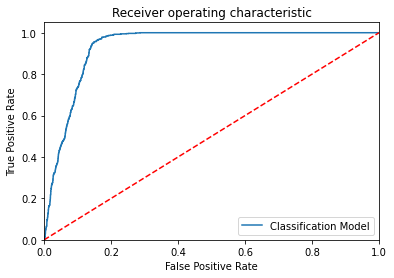

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  874    51]
 [   49 18514]]
Outcome values : 
 874 51 49 18514
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.94      0.95       925
           0       1.00      1.00      1.00     18563

    accuracy                           0.99     19488
   macro avg       0.97      0.97      0.97     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 99.5 %
Precision : 94.7 %
Recall : 94.5 %
F1 Score : 0.946
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 97.1 %
roc_auc_score: 0.971


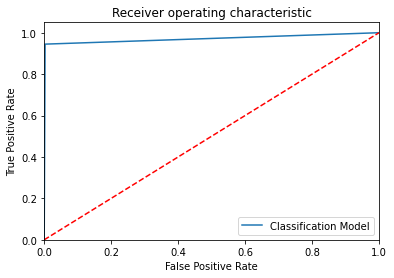

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  867    58]
 [    8 18555]]
Outcome values : 
 867 58 8 18555
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.94      0.96       925
           0       1.00      1.00      1.00     18563

    accuracy                           1.00     19488
   macro avg       0.99      0.97      0.98     19488
weighted avg       1.00      1.00      1.00     19488

Accuracy : 99.7 %
Precision : 99.1 %
Recall : 93.7 %
F1 Score : 0.963
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 96.8 %
roc_auc_score: 0.968


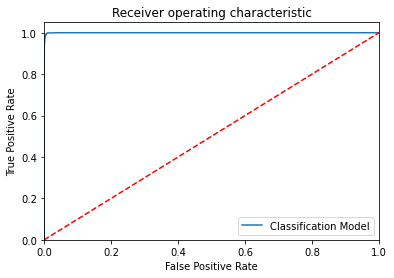

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  857    68]
 [   23 18540]]
Outcome values : 
 857 68 23 18540
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.93      0.95       925
           0       1.00      1.00      1.00     18563

    accuracy                           1.00     19488
   macro avg       0.99      0.96      0.97     19488
weighted avg       1.00      1.00      1.00     19488

Accuracy : 99.5 %
Precision : 97.4 %
Recall : 92.6 %
F1 Score : 0.95
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 96.2 %
roc_auc_score: 0.963


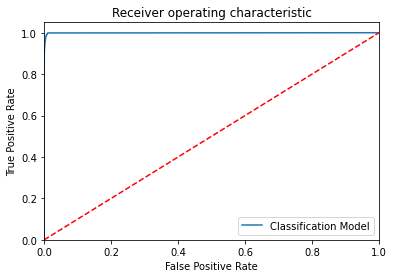

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  922     3]
 [ 4120 14443]]
Outcome values : 
 922 3 4120 14443
Classification report : 
               precision    recall  f1-score   support

           1       0.18      1.00      0.31       925
           0       1.00      0.78      0.88     18563

    accuracy                           0.79     19488
   macro avg       0.59      0.89      0.59     19488
weighted avg       0.96      0.79      0.85     19488

Accuracy : 78.8 %
Precision : 18.3 %
Recall : 99.7 %
F1 Score : 0.309
Specificity or True Negative Rate : 77.8 %
Balanced Accuracy : 88.8 %
roc_auc_score: 0.887


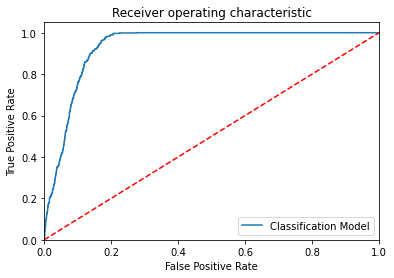

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  770   155]
 [  104 18459]]
Outcome values : 
 770 155 104 18459
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.83      0.86       925
           0       0.99      0.99      0.99     18563

    accuracy                           0.99     19488
   macro avg       0.94      0.91      0.92     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 98.7 %
Precision : 88.1 %
Recall : 83.2 %
F1 Score : 0.856
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 91.3 %
roc_auc_score: 0.913


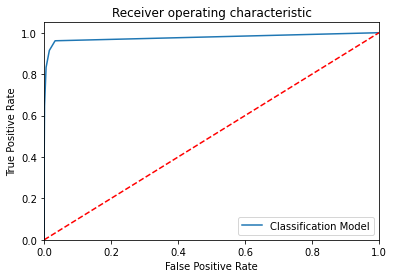

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[    0   925]
 [    0 18563]]
Outcome values : 
 0 925 0 18563
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       925
           0       0.95      1.00      0.98     18563

    accuracy                           0.95     19488
   macro avg       0.48      0.50      0.49     19488
weighted avg       0.91      0.95      0.93     19488

Accuracy : 95.3 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


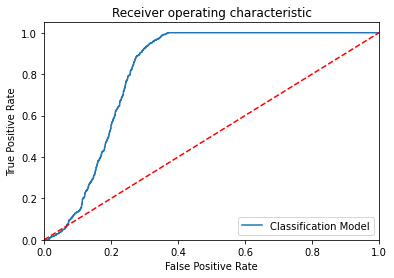

-----------------------------------------------------------------------------------------------------


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKN = KNeighborsClassifier()
modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

bankdataSVMPoly = SVC(kernel='poly', degree=2, probability=True)
# Evalution matrix for all the algorithm

MM = [ModelLR, ModelDC, ModelRF, ModelET,modelGNB,ModelKN,bankdataSVMPoly]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    P_Results = P_Results.append(new_row, ignore_index=True)

In [14]:
P_Results = pd.read_csv(r"C:\aiml\project\P_Results.csv")
P_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [18]:
P_Results.to_csv("C:\Aiml\project\P_Results.csv")

P_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False Negative,False Positive,True Negative,True Positive
0,LogisticRegression(),NaN,NaN,NaN,NaN,0.951,0.341,0.045,0.080,0.996,MCC,0.520521,0.520,883.0,81.0,18482.0,42.0
1,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,0.995,0.947,0.945,0.946,0.997,MCC,0.971113,0.971,51.0,49.0,18514.0,874.0
2,"(DecisionTreeClassifier(max_features='sqrt', r...",NaN,NaN,NaN,NaN,0.997,0.991,0.937,0.963,1.000,MCC,0.968433,0.968,58.0,8.0,18555.0,867.0
3,"(ExtraTreeClassifier(random_state=410991271), ...",NaN,NaN,NaN,NaN,0.995,0.974,0.926,0.950,0.999,MCC,0.962624,0.962,68.0,23.0,18540.0,857.0
4,GaussianNB(),NaN,NaN,NaN,NaN,0.788,0.183,0.997,0.309,0.778,MCC,0.887405,0.888,3.0,4120.0,14443.0,922.0
5,KNeighborsClassifier(),NaN,NaN,NaN,NaN,0.987,0.881,0.832,0.856,0.994,MCC,0.913415,0.913,155.0,104.0,18459.0,770.0
6,"SVC(degree=2, kernel='poly', probability=True)",NaN,NaN,NaN,NaN,0.953,NaN,0.000,0.000,1.000,MCC,0.500000,0.500,925.0,0.0,18563.0,0.0
